In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, clear_output
import time



In [2]:
image_folder = "images"
images = sorted(os.listdir(image_folder))

print("Total frames:", len(images))



Total frames: 41


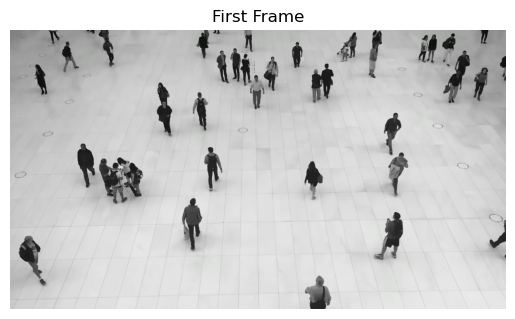

In [3]:
first_frame = cv2.imread(os.path.join(image_folder, images[0]))

plt.imshow(cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB))
plt.title("First Frame")
plt.axis("off")
plt.show()



In [4]:
r = cv2.selectROI("Select Person", first_frame, False)
cv2.destroyAllWindows()

x, y, w, h = r
print("ROI:", r)



ROI: (486, 295, 75, 135)


In [5]:
roi = first_frame[y:y+h, x:x+w]

hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

roi_hist = cv2.calcHist([hsv_roi], [0], None, [180], [0,180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

print("Histogram ready.")



Histogram ready.


In [6]:
track_window = (x, y, w, h)

term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

print("MeanShift ready.")



MeanShift ready.


In [7]:
results = []

for img_name in images:
    
    frame = cv2.imread(os.path.join(image_folder, img_name))
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    back_proj = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)
    
    # Apply MeanShift (NOT CamShift)
    ret, track_window = cv2.meanShift(back_proj, track_window, term_crit)
    
    x, y, w, h = track_window
    result = cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0), 2)
    
    results.append(result)


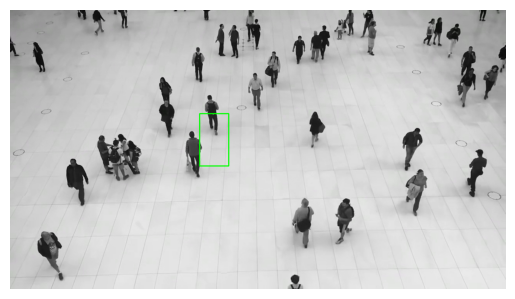

In [8]:
for frame in results:
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.05)
